In [66]:
from files.utils.constants import *
from files.utils.utility_functions import *
from files.pif.pif import *

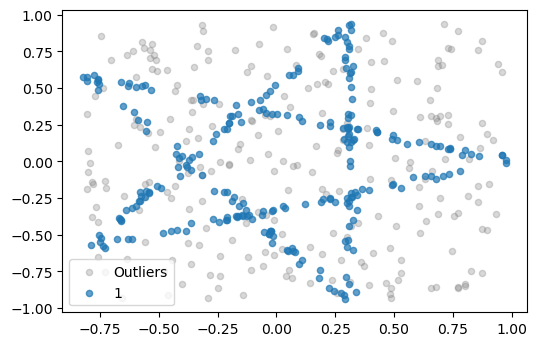

In [67]:
ds, gt = load_dataset_by_name("star5", file_path=joinpath(ROOT_PATH, "..", "..", "datasets", "2d", "lines", "with_outliers"))
plot_clusters(gt, ds)

In [68]:
from files.models.self_organizing_maps import *
som = SelfOrganizingMaps(n_rows=21, n_cols=21, sigma=3, lr=1)
# som = SelfOrganizingMaps(n_rows=4, n_cols=4, sigma=1, lr=1)
som.fit(data=ds, epochs=10000, verbose=1)
scores = som.get_residuals(data=ds)

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.03161452686095092


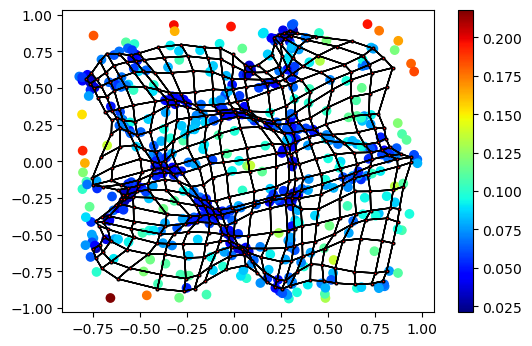

In [69]:
fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)
cax = ax.scatter(ds[:,0], ds[:,1], c=scores, cmap="jet")
som.plot_weights_lattice(ax=ax)
fig.colorbar(ax=ax, mappable=cax)

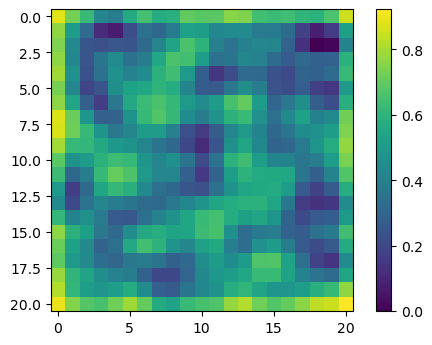

In [70]:
plt.figure(dpi=100)
plt.imshow(1-som.minisom.distance_map())
plt.colorbar()

In [71]:
def get_residuals(w, data):
    winners = np.array([np.argmin([np.linalg.norm(w - [p for _ in w], axis=1)]) for p in data])
    return np.linalg.norm(w[winners] - data, axis=1)

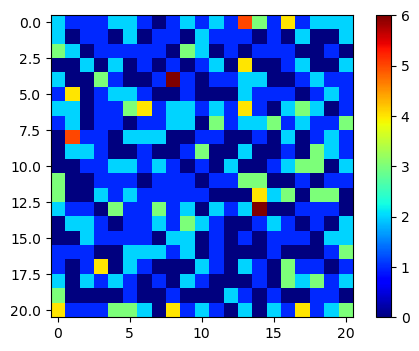

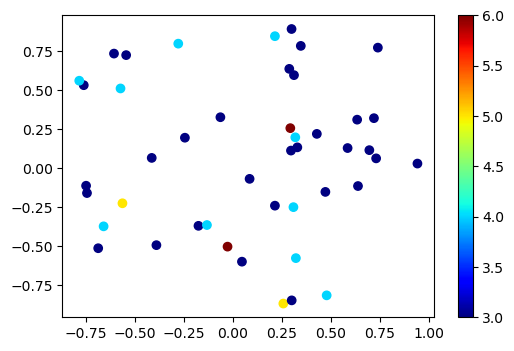

In [72]:
w = som.minisom.get_weights()
w = w.reshape(w.shape[0]*w.shape[1], w.shape[2])
resp = som.minisom.activation_response(data=ds)
plt.figure(dpi=100)
plt.imshow(resp, cmap="jet")
plt.colorbar()
resp = resp.reshape(resp.shape[0]*resp.shape[1])
plt.figure(dpi=100)
idxs = resp > (np.median(resp) + mad(resp))
w = w[idxs]
plt.scatter(w[:,0], w[:,1], c=resp[idxs], cmap="jet")
plt.colorbar()

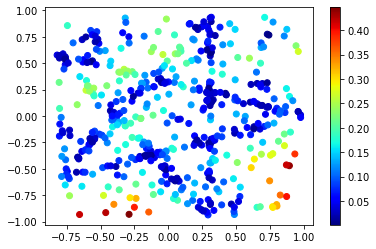

In [73]:
scores = get_residuals(w, ds)
plt.scatter(ds[:,0], ds[:,1], c=scores, cmap="jet")
plt.colorbar()

In [74]:
from files.pif.pif import build_preference_matrix

# scores, _ = build_preference_matrix(data=ds, models_ithrs=np.array([[som, 0.022]]))
# scores = scores.flatten()

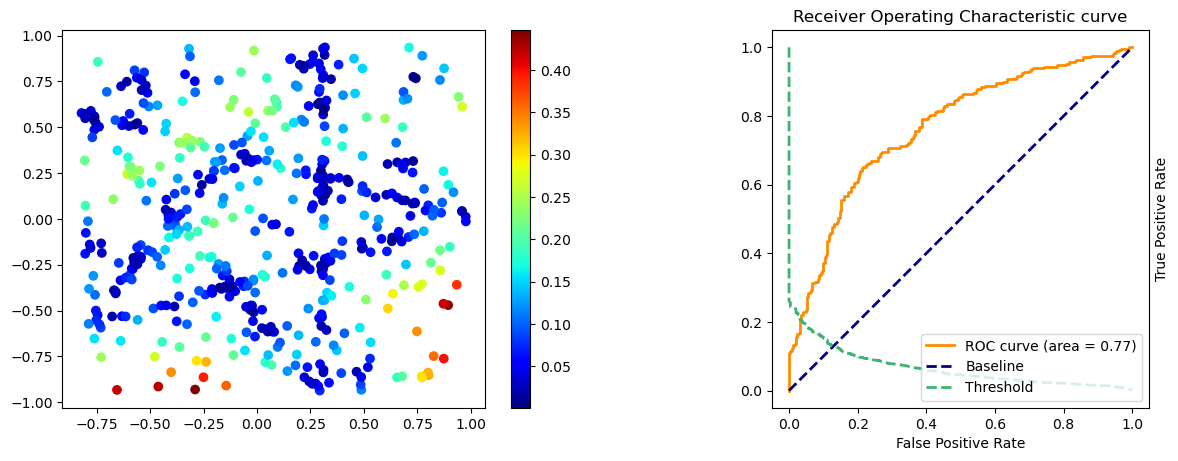

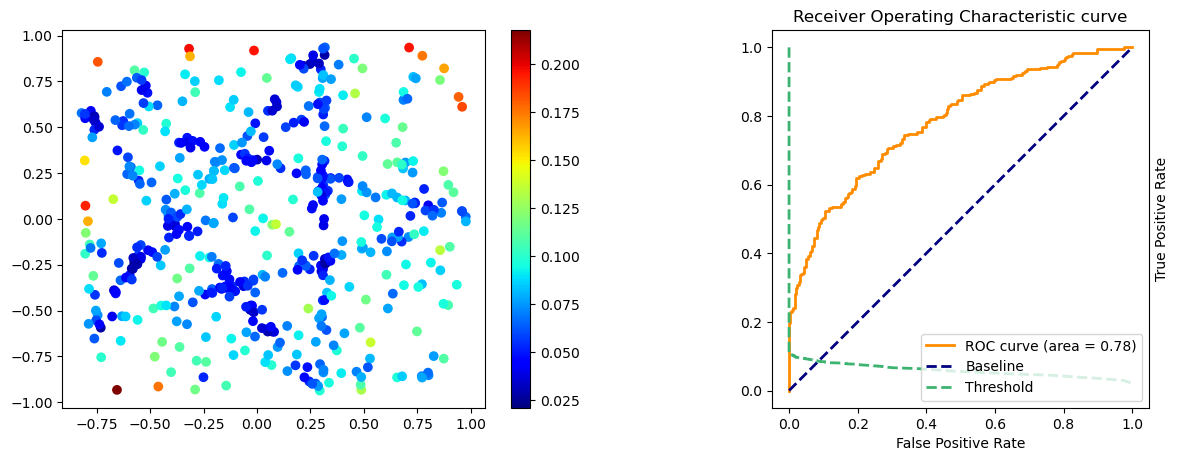

In [75]:
scores = get_residuals(w, ds)
fig, (ax1, ax2) = plt.subplots(1, 2, dpi=100, figsize=(15, 5))
im1 = ax1.scatter(ds[:,0], ds[:,1], c=scores, cmap="jet")
fig.colorbar(ax=ax1, mappable=im1)
ogt = gt.copy()
ogt[ogt == 1] = -1
ogt[ogt == 0] = 1
ogt[ogt == -1] = 0
make_roc(gt=gt, scores=scores, orig_ax=ax2);

scores = som.get_residuals(ds)
fig, (ax1, ax2) = plt.subplots(1, 2, dpi=100, figsize=(15, 5))
im1 = ax1.scatter(ds[:,0], ds[:,1], c=scores, cmap="jet")
fig.colorbar(ax=ax1, mappable=im1)
make_roc(gt=gt, scores=scores, orig_ax=ax2);